In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

#Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
sns.set_style('white')
sns.set_style('darkgrid')
pylab.rcParams['figure.figsize'] = 12,8

In [64]:
train_data = pd.read_csv('cirrhosis.csv')
train_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [65]:
print(train_data.shape)
print('-'*50)

(418, 20)
--------------------------------------------------


In [66]:
print(train_data.info())
print('-'*50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             418 non-null    int64  
 1   N_Days         418 non-null    int64  
 2   Status         418 non-null    object 
 3   Drug           312 non-null    object 
 4   Age            418 non-null    int64  
 5   Sex            418 non-null    object 
 6   Ascites        312 non-null    object 
 7   Hepatomegaly   312 non-null    object 
 8   Spiders        312 non-null    object 
 9   Edema          418 non-null    object 
 10  Bilirubin      418 non-null    float64
 11  Cholesterol    284 non-null    float64
 12  Albumin        418 non-null    float64
 13  Copper         310 non-null    float64
 14  Alk_Phos       312 non-null    float64
 15  SGOT           312 non-null    float64
 16  Tryglicerides  282 non-null    float64
 17  Platelets      407 non-null    float64
 18  Prothrombi

In [67]:
cols = train_data.columns.to_list()
print(cols)
train_data[cols].nunique()

['ID', 'N_Days', 'Status', 'Drug', 'Age', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']


ID               418
N_Days           399
Status             3
Drug               2
Age              344
Sex                2
Ascites            2
Hepatomegaly       2
Spiders            2
Edema              3
Bilirubin         98
Cholesterol      201
Albumin          154
Copper           158
Alk_Phos         295
SGOT             179
Tryglicerides    146
Platelets        243
Prothrombin       48
Stage              4
dtype: int64

In [68]:
train_data.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [69]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64


In [70]:
# Drop rows with any null values
train_data = train_data.dropna()

In [71]:
print('Train columns with null values:\n')
print(train_data.isnull().sum())

Train columns with null values:

ID               0
N_Days           0
Status           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
dtype: int64


In [72]:
# Convert binary features
train_data['Sex'] = train_data['Sex'].map({'M': 1, 'F': 0})
train_data['Ascites'] = train_data['Ascites'].map({'Y': 1, 'N': 0})
train_data['Hepatomegaly'] = train_data['Hepatomegaly'].map({'Y': 1, 'N': 0})
train_data['Spiders'] = train_data['Spiders'].map({'Y': 1, 'N': 0})

# Display the modified DataFrame
print(train_data)

      ID  N_Days Status             Drug    Age  Sex  Ascites  Hepatomegaly  \
0      1     400      D  D-penicillamine  21464    0        1             1   
1      2    4500      C  D-penicillamine  20617    0        0             1   
2      3    1012      D  D-penicillamine  25594    1        0             0   
3      4    1925      D  D-penicillamine  19994    0        0             1   
4      5    1504     CL          Placebo  13918    0        0             1   
..   ...     ...    ...              ...    ...  ...      ...           ...   
307  308    1153      C  D-penicillamine  22347    0        0             1   
308  309     994      C          Placebo  21294    0        0             0   
309  310     939      C  D-penicillamine  22767    0        0             0   
310  311     839      C  D-penicillamine  13879    0        0             0   
311  312     788      C          Placebo  12109    0        0             0   

     Spiders Edema  Bilirubin  Cholesterol  Albumin

In [73]:
train_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,0,1,1,1,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,0,0,1,1,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,1,0,0,0,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,0,0,1,1,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,0,0,1,1,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,0,0,1,0,N,0.4,246.0,3.58,24.0,797.0,91.00,113.0,288.0,10.4,2.0
308,309,994,C,Placebo,21294,0,0,0,0,N,0.4,260.0,2.75,41.0,1166.0,70.00,82.0,231.0,10.8,2.0
309,310,939,C,D-penicillamine,22767,0,0,0,0,N,1.7,434.0,3.35,39.0,1713.0,171.00,100.0,234.0,10.2,2.0
310,311,839,C,D-penicillamine,13879,0,0,0,0,N,2.0,247.0,3.16,69.0,1050.0,117.00,88.0,335.0,10.5,2.0


In [74]:
# Apply one-hot encoding to the 'Edema' column
edema_dummies = pd.get_dummies(train_data['Edema'], prefix='Edema')

# Concatenate the new columns to the original DataFrame
train_data = pd.concat([train_data, edema_dummies], axis=1)

# Optionally, drop the original 'Edema' column if no longer needed
train_data = train_data.drop('Edema', axis=1)

In [75]:
train_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,1,400,D,D-penicillamine,21464,0,1,1,1,14.5,...,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,False,False,True
1,2,4500,C,D-penicillamine,20617,0,0,1,1,1.1,...,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,True,False,False
2,3,1012,D,D-penicillamine,25594,1,0,0,0,1.4,...,210.0,516.0,96.10,55.0,151.0,12.0,4.0,False,True,False
3,4,1925,D,D-penicillamine,19994,0,0,1,1,1.8,...,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,False,True,False
4,5,1504,CL,Placebo,13918,0,0,1,1,3.4,...,143.0,671.0,113.15,72.0,136.0,10.9,3.0,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,D-penicillamine,22347,0,0,1,0,0.4,...,24.0,797.0,91.00,113.0,288.0,10.4,2.0,True,False,False
308,309,994,C,Placebo,21294,0,0,0,0,0.4,...,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,True,False,False
309,310,939,C,D-penicillamine,22767,0,0,0,0,1.7,...,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,True,False,False
310,311,839,C,D-penicillamine,13879,0,0,0,0,2.0,...,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,True,False,False


In [76]:
# Convert the True/False values to 1/0
train_data['Edema_N'] = train_data['Edema_N'].astype(int)
train_data['Edema_Y'] = train_data['Edema_Y'].astype(int)
train_data['Edema_S'] = train_data['Edema_S'].astype(int)

# Now, the columns 'Edema_N', 'Edema_Y', and 'Edema_S' will have values 1 or 0 instead of True or False.

In [77]:
print(train_data)

      ID  N_Days Status             Drug    Age  Sex  Ascites  Hepatomegaly  \
0      1     400      D  D-penicillamine  21464    0        1             1   
1      2    4500      C  D-penicillamine  20617    0        0             1   
2      3    1012      D  D-penicillamine  25594    1        0             0   
3      4    1925      D  D-penicillamine  19994    0        0             1   
4      5    1504     CL          Placebo  13918    0        0             1   
..   ...     ...    ...              ...    ...  ...      ...           ...   
307  308    1153      C  D-penicillamine  22347    0        0             1   
308  309     994      C          Placebo  21294    0        0             0   
309  310     939      C  D-penicillamine  22767    0        0             0   
310  311     839      C  D-penicillamine  13879    0        0             0   
311  312     788      C          Placebo  12109    0        0             0   

     Spiders  Bilirubin  ...  Copper  Alk_Phos    S

In [78]:
# Convert 'Drug' to binary format
# Assuming 'D-penicillamine' is the drug, map it to 1, and 'Placebo' to 0
train_data['Drug'] = train_data['Drug'].map({'D-penicillamine': 1, 'Placebo': 0})

# Now, the 'Drug' column will have values 1 (for D-penicillamine) or 0 (for Placebo)

In [79]:
train_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,1,400,D,1,21464,0,1,1,1,14.5,...,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1
1,2,4500,C,1,20617,0,0,1,1,1.1,...,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0
2,3,1012,D,1,25594,1,0,0,0,1.4,...,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,1,0
3,4,1925,D,1,19994,0,0,1,1,1.8,...,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,1,0
4,5,1504,CL,0,13918,0,0,1,1,3.4,...,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,1,22347,0,0,1,0,0.4,...,24.0,797.0,91.00,113.0,288.0,10.4,2.0,1,0,0
308,309,994,C,0,21294,0,0,0,0,0.4,...,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,1,0,0
309,310,939,C,1,22767,0,0,0,0,1.7,...,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,1,0,0
310,311,839,C,1,13879,0,0,0,0,2.0,...,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,1,0,0


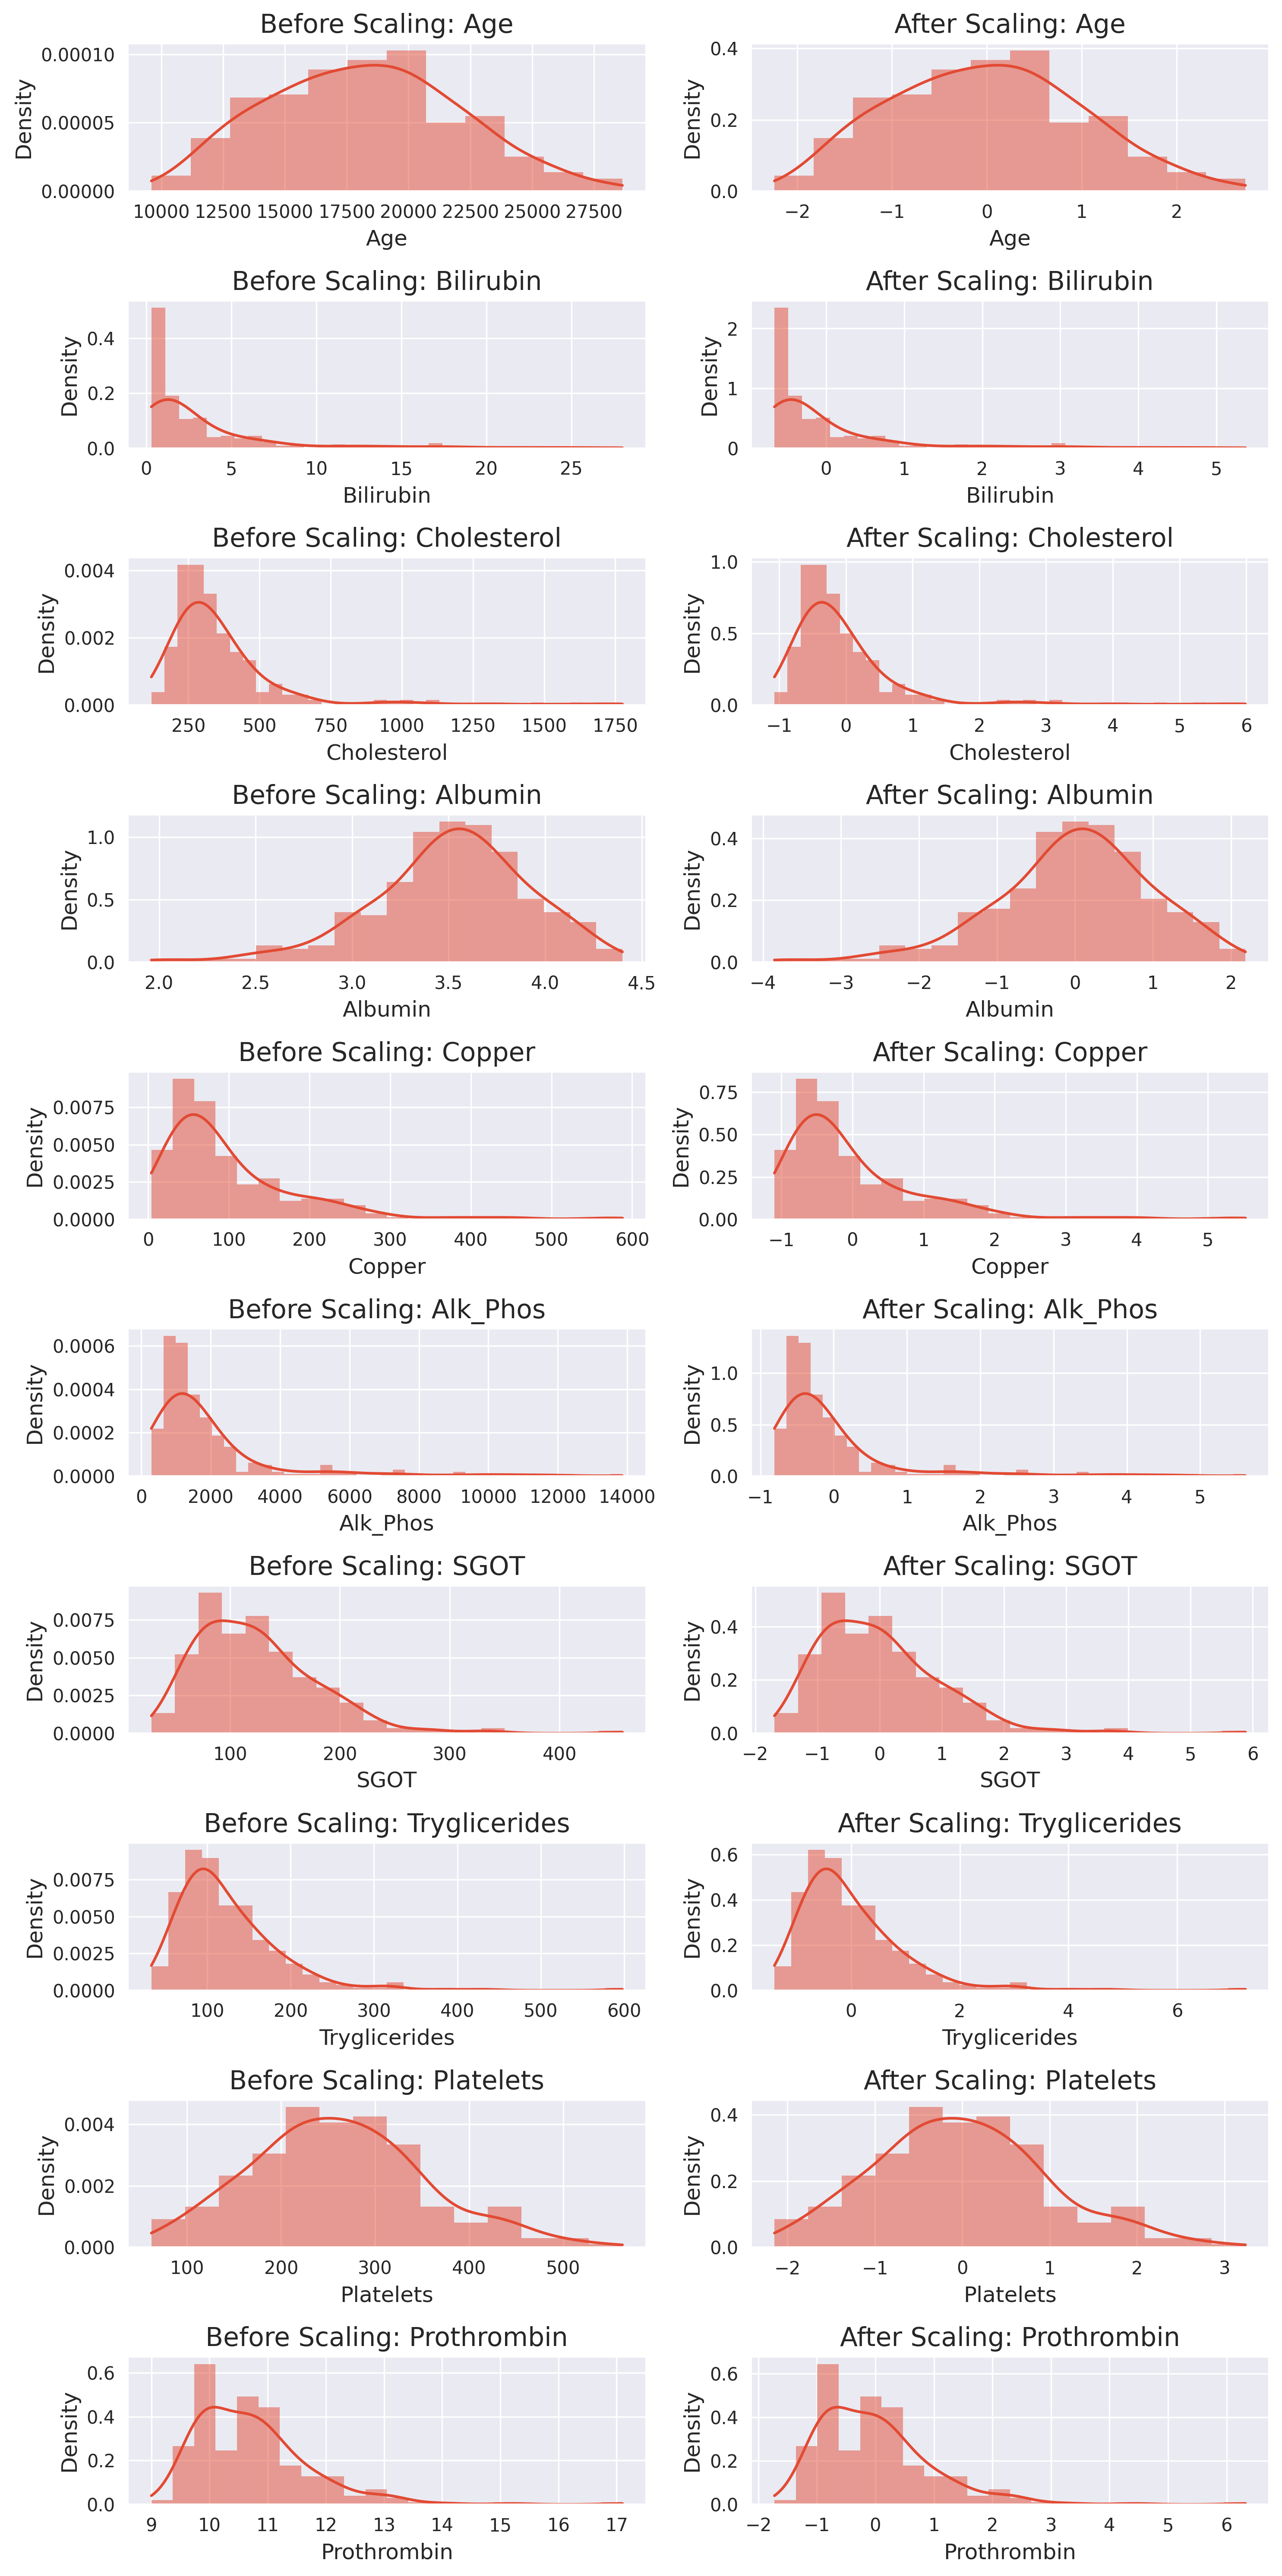

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

features_to_scale = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin']

# Apply scaling
scaler = StandardScaler() # or MinMaxScaler
train_data_scaled = train_data.copy()
train_data_scaled[features_to_scale] = scaler.fit_transform(train_data_scaled[features_to_scale])

# Define the number of rows and columns for subplots
n_rows = len(features_to_scale)
n_cols = 2  # Two columns for before and after

# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot histograms
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.histplot(train_data[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')

    # After scaling
    sns.histplot(train_data_scaled[feature], kde=True, stat="density", linewidth=0, ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [81]:
train_data_scaled

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,1,400,D,1,0.853538,0,1,1,1,2.431300,...,0.626861,-0.131941,0.244286,0.721609,-0.772071,1.455055,4.0,0,0,1
1,2,4500,C,1,0.632769,0,0,1,1,-0.486355,...,-0.530800,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,3.0,1,0,0
2,3,1012,D,1,1.930016,1,0,0,0,-0.421034,...,1.239740,-0.701166,-0.494890,-1.073906,-1.191607,1.256344,4.0,0,1,0
3,4,1925,D,1,0.470385,0,0,1,1,-0.333940,...,-0.417304,1.953545,-1.121379,-0.506093,-0.847372,-0.432701,4.0,0,1,0
4,5,1504,CL,0,-1.113314,0,0,1,1,0.014437,...,0.479316,-0.627763,-0.193744,-0.813019,-1.352966,0.163433,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,1,1.083691,0,0,1,0,-0.638769,...,-0.871289,-0.568094,-0.584969,-0.183822,0.282146,-0.333345,2.0,1,0,0
308,309,994,C,0,0.809228,0,0,0,0,-0.638769,...,-0.678345,-0.393349,-0.955881,-0.659556,-0.331021,0.064077,2.0,1,0,0
309,310,939,C,1,1.193163,0,0,0,0,-0.355713,...,-0.701045,-0.134309,0.828032,-0.383323,-0.298749,-0.532056,2.0,1,0,0
310,311,839,C,1,-1.123479,0,0,0,0,-0.290393,...,-0.360556,-0.448282,-0.125744,-0.567479,0.787740,-0.233990,2.0,1,0,0


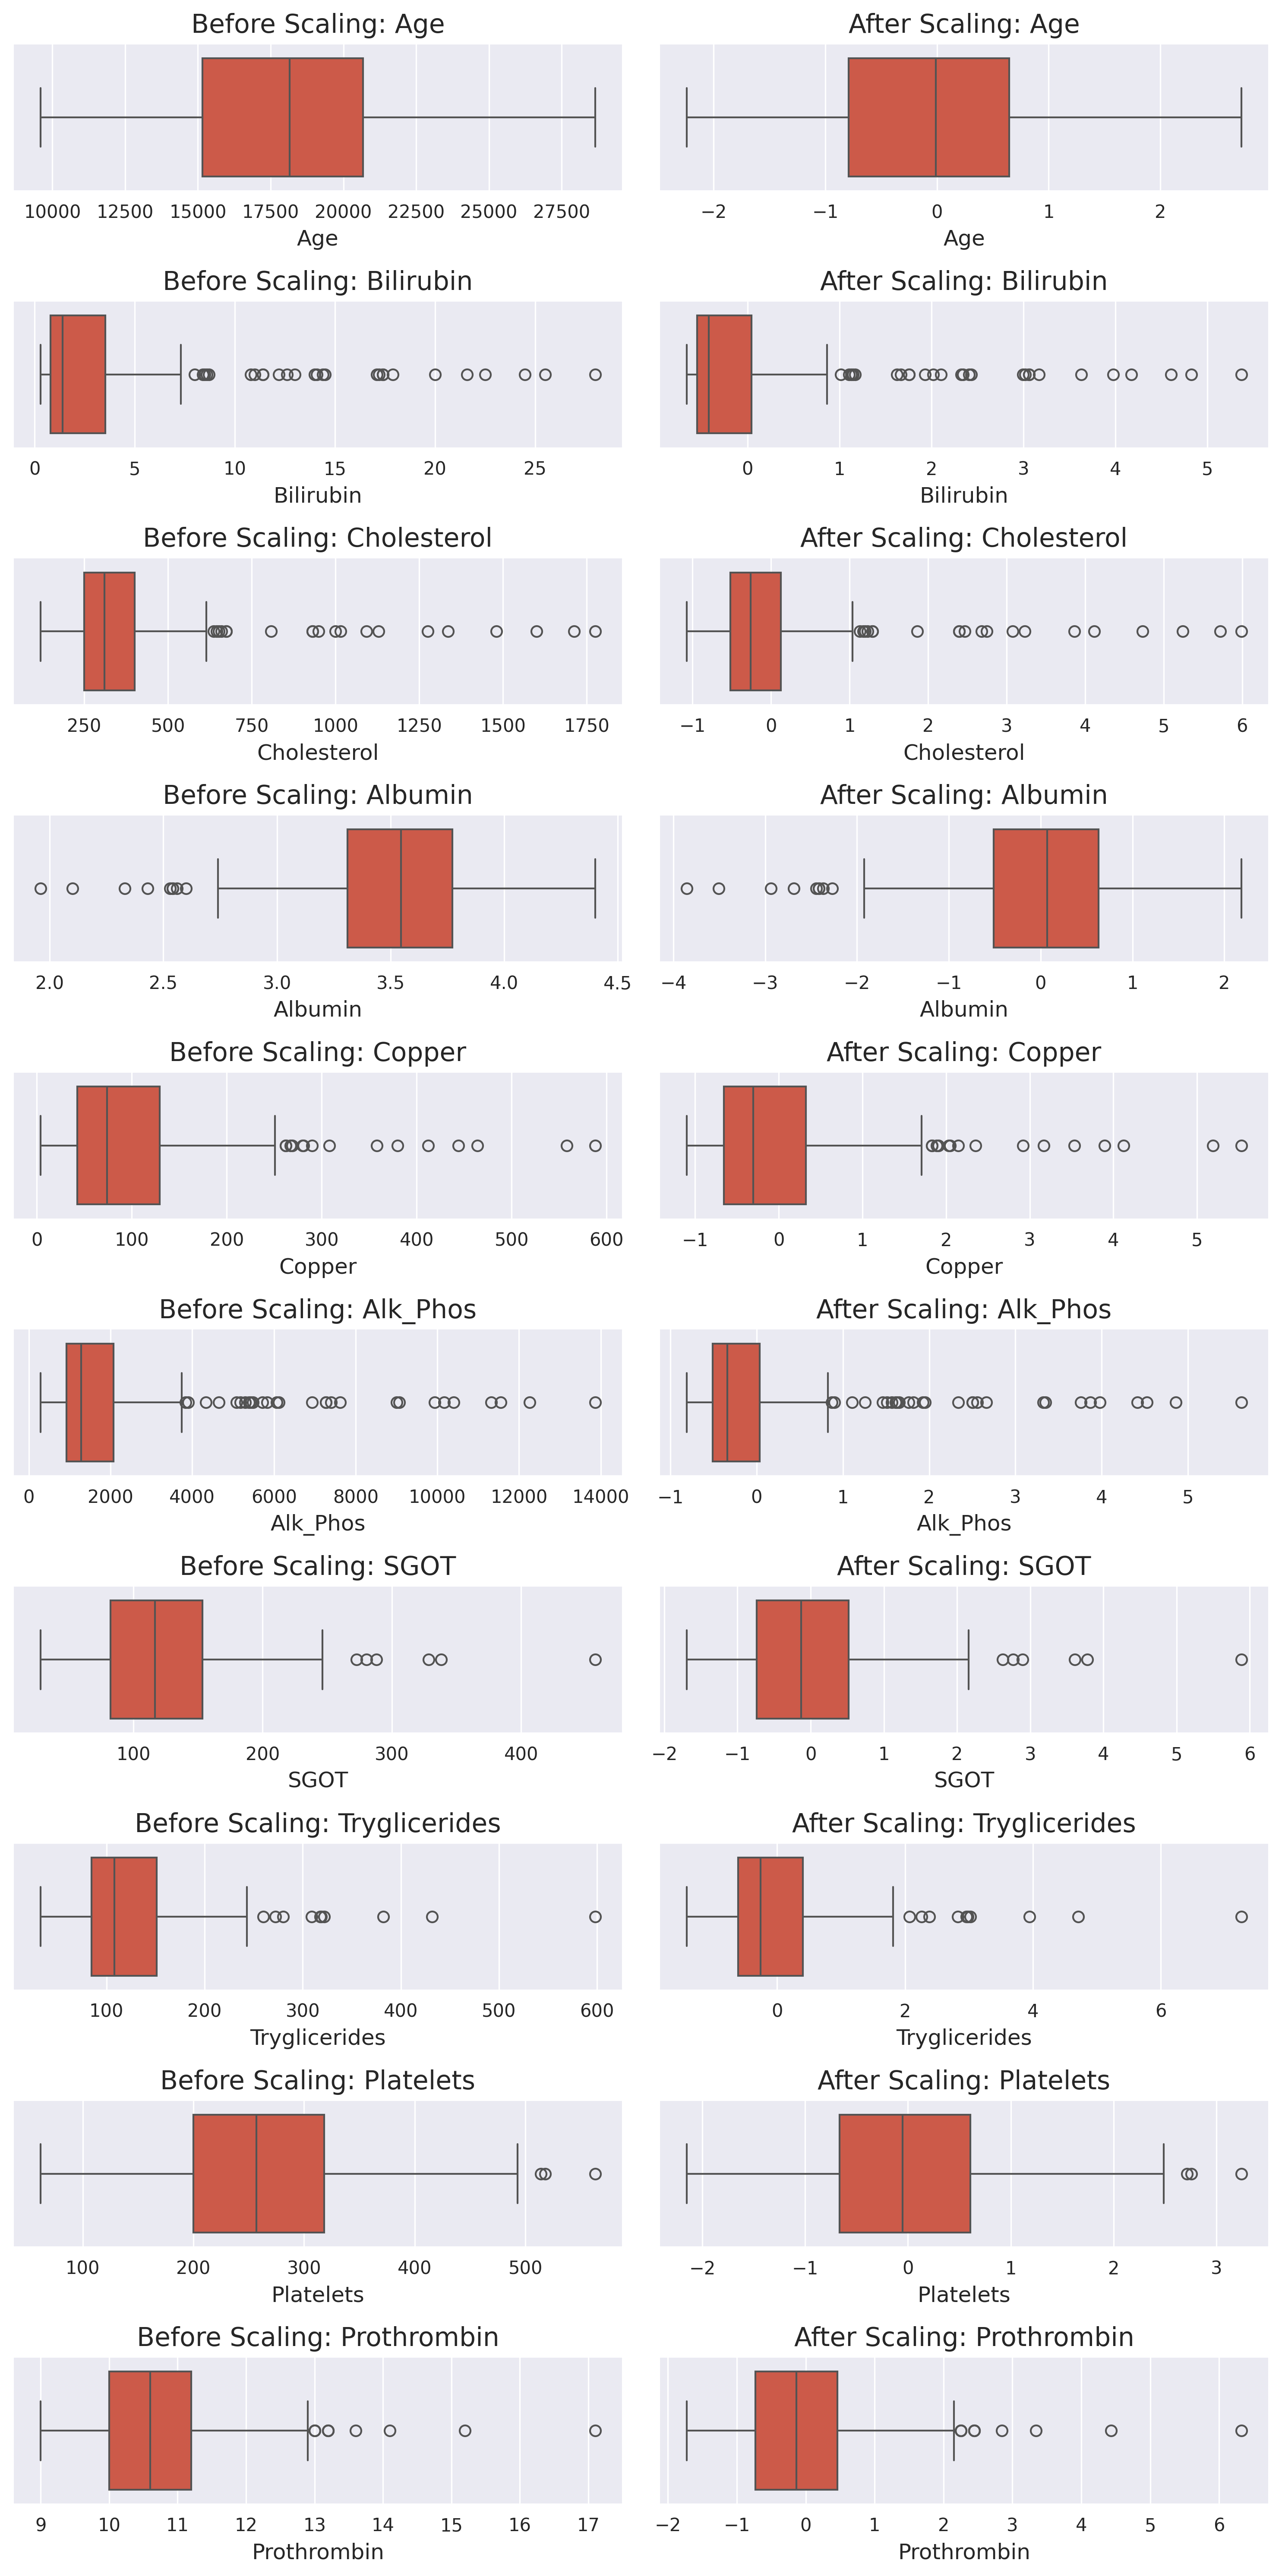

In [82]:
# Create a figure and axes for subplots
fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 2 * n_rows), dpi=300)

# Plot box plots
for i, feature in enumerate(features_to_scale):
    # Before scaling
    sns.boxplot(x=train_data[feature], ax=axes[i, 0])
    axes[i, 0].set_title(f'Before Scaling: {feature}')

    # After scaling
    sns.boxplot(x=train_data_scaled[feature], ax=axes[i, 1])
    axes[i, 1].set_title(f'After Scaling: {feature}')

# Adjust layout
plt.tight_layout()
plt.show()

In [83]:
train_data

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,...,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y
0,1,400,D,1,21464,0,1,1,1,14.5,...,156.0,1718.0,137.95,172.0,190.0,12.2,4.0,0,0,1
1,2,4500,C,1,20617,0,0,1,1,1.1,...,54.0,7394.8,113.52,88.0,221.0,10.6,3.0,1,0,0
2,3,1012,D,1,25594,1,0,0,0,1.4,...,210.0,516.0,96.10,55.0,151.0,12.0,4.0,0,1,0
3,4,1925,D,1,19994,0,0,1,1,1.8,...,64.0,6121.8,60.63,92.0,183.0,10.3,4.0,0,1,0
4,5,1504,CL,0,13918,0,0,1,1,3.4,...,143.0,671.0,113.15,72.0,136.0,10.9,3.0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,C,1,22347,0,0,1,0,0.4,...,24.0,797.0,91.00,113.0,288.0,10.4,2.0,1,0,0
308,309,994,C,0,21294,0,0,0,0,0.4,...,41.0,1166.0,70.00,82.0,231.0,10.8,2.0,1,0,0
309,310,939,C,1,22767,0,0,0,0,1.7,...,39.0,1713.0,171.00,100.0,234.0,10.2,2.0,1,0,0
310,311,839,C,1,13879,0,0,0,0,2.0,...,69.0,1050.0,117.00,88.0,335.0,10.5,2.0,1,0,0


In [84]:
# Assuming train_data is your DataFrame

# Store the 'Status' column in a temporary variable
status = train_data_scaled['Status']

# Drop the 'Status' column from the original DataFrame
train_data_scaled = train_data_scaled.drop('Status', axis=1)

# Add the 'Status' column back, but now it will be at the end
train_data_scaled['Status'] = status

In [85]:
train_data_scaled

,ID,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Status
0,1,400,1,0.853538,0,1,1,1,2.431300,-0.470471,...,-0.131941,0.244286,0.721609,-0.772071,1.455055,4.0,0,0,1,D
1,2,4500,1,0.632769,0,0,1,1,-0.486355,-0.295529,...,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,3.0,1,0,0,C
2,3,1012,1,1.930016,1,0,0,0,-0.421034,-0.833157,...,-0.701166,-0.494890,-1.073906,-1.191607,1.256344,4.0,0,1,0,D
3,4,1925,1,0.470385,0,0,1,1,-0.333940,-0.543008,...,1.953545,-1.121379,-0.506093,-0.847372,-0.432701,4.0,0,1,0,D
4,5,1504,0,-1.113314,0,0,1,1,0.014437,-0.393667,...,-0.627763,-0.193744,-0.813019,-1.352966,0.163433,3.0,1,0,0,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,308,1153,1,1.083691,0,0,1,0,-0.638769,-0.534475,...,-0.568094,-0.584969,-0.183822,0.282146,-0.333345,2.0,1,0,0,C
308,309,994,0,0.809228,0,0,0,0,-0.638769,-0.474738,...,-0.393349,-0.955881,-0.659556,-0.331021,0.064077,2.0,1,0,0,C
309,310,939,1,1.193163,0,0,0,0,-0.355713,0.267701,...,-0.134309,0.828032,-0.383323,-0.298749,-0.532056,2.0,1,0,0,C
310,311,839,1,-1.123479,0,0,0,0,-0.290393,-0.530208,...,-0.448282,-0.125744,-0.567479,0.787740,-0.233990,2.0,1,0,0,C


In [86]:
# Drop the 'id' column
train_data_scaled = train_data_scaled.drop('ID', axis=1)

In [87]:
train_data_scaled

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Bilirubin,Cholesterol,Albumin,...,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Edema_N,Edema_S,Edema_Y,Status
0,400,1,0.853538,0,1,1,1,2.431300,-0.470471,-2.269029,...,-0.131941,0.244286,0.721609,-0.772071,1.455055,4.0,0,0,1,D
1,4500,1,0.632769,0,0,1,1,-0.486355,-0.295529,1.542337,...,2.556394,-0.187209,-0.567479,-0.438594,-0.134634,3.0,1,0,0,C
2,1012,1,1.930016,1,0,0,0,-0.421034,-0.833157,-0.091105,...,-0.701166,-0.494890,-1.073906,-1.191607,1.256344,4.0,0,1,0,D
3,1925,1,0.470385,0,0,1,1,-0.333940,-0.543008,-2.417524,...,1.953545,-1.121379,-0.506093,-0.847372,-0.432701,4.0,0,1,0,D
4,1504,0,-1.113314,0,0,1,1,0.014437,-0.393667,0.032640,...,-0.627763,-0.193744,-0.813019,-1.352966,0.163433,3.0,1,0,0,CL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
307,1153,1,1.083691,0,0,1,0,-0.638769,-0.534475,0.156386,...,-0.568094,-0.584969,-0.183822,0.282146,-0.333345,2.0,1,0,0,C
308,994,0,0.809228,0,0,0,0,-0.638769,-0.474738,-1.897792,...,-0.393349,-0.955881,-0.659556,-0.331021,0.064077,2.0,1,0,0,C
309,939,1,1.193163,0,0,0,0,-0.355713,0.267701,-0.412844,...,-0.134309,0.828032,-0.383323,-0.298749,-0.532056,2.0,1,0,0,C
310,839,1,-1.123479,0,0,0,0,-0.290393,-0.530208,-0.883078,...,-0.448282,-0.125744,-0.567479,0.787740,-0.233990,2.0,1,0,0,C


In [97]:
from sklearn.model_selection import train_test_split

# Assuming 'Status' is your target variable
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)  # Adjust test_size as needed

In [98]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Initialize the Decision Tree Classifier
decision_tree = DecisionTreeClassifier()

# Train the model on the training data
decision_tree.fit(X_train, y_train)

# Predict on the test data
y_pred = decision_tree.predict(X_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           C       0.80      0.70      0.74        50
          CL       0.00      0.00      0.00         1
           D       0.66      0.59      0.62        32

    accuracy                           0.65        83
   macro avg       0.48      0.43      0.46        83
weighted avg       0.73      0.65      0.69        83

Confusion Matrix:
 [[35  5 10]
 [ 1  0  0]
 [ 8  5 19]]


In [99]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Define the Decision Tree model
dt = DecisionTreeClassifier()

# Define a grid of hyperparameters
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Setup Grid Search
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform grid search on the data
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5}
Best Score: 0.6641025641025641


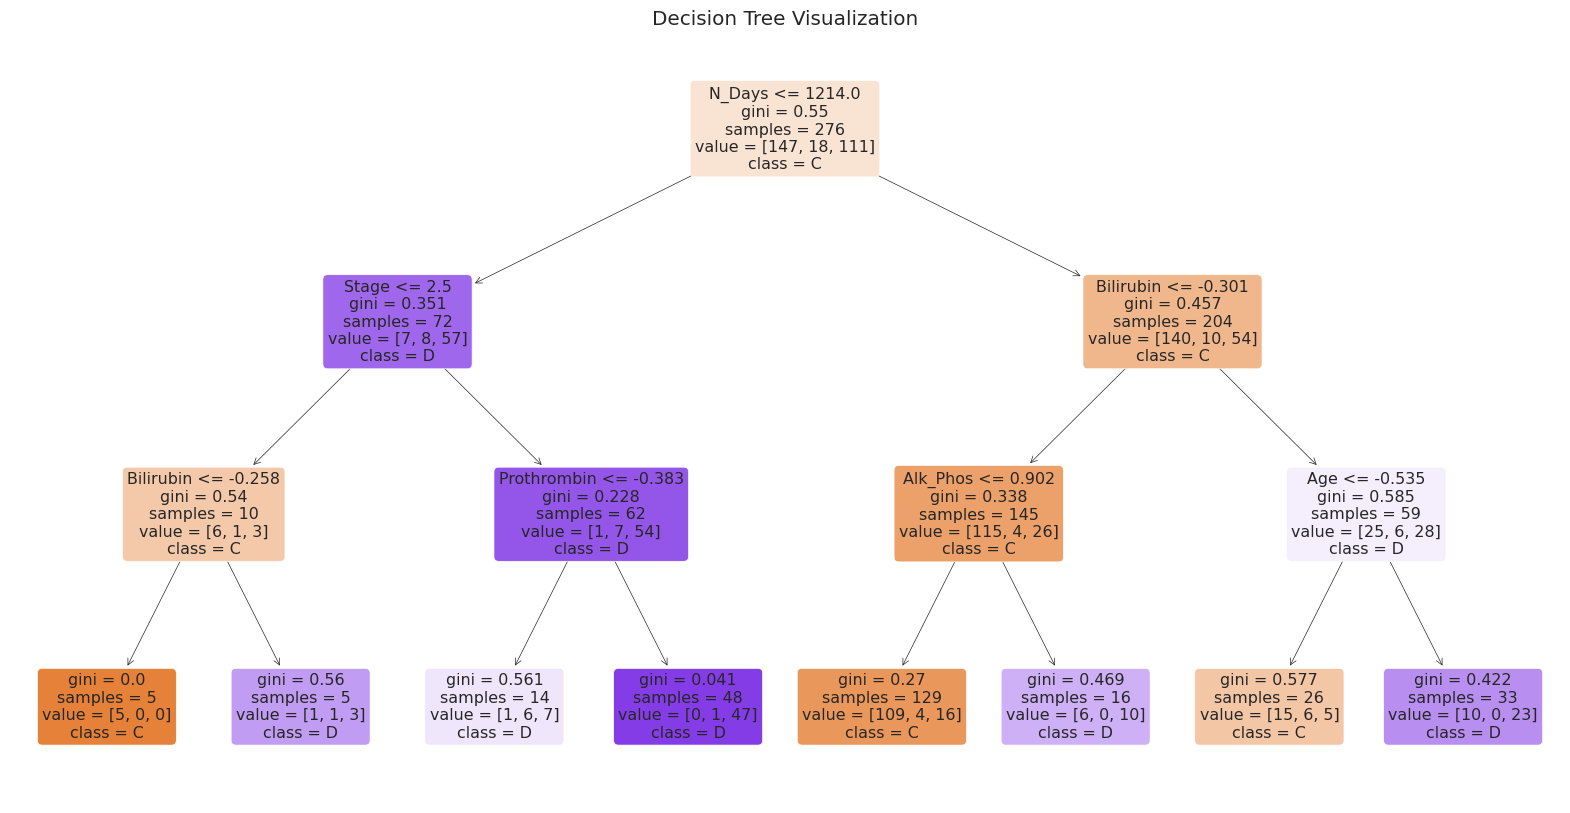

In [100]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Assuming 'X' and 'y' are your training dataset and labels
# Replace this with your trained Decision Tree model
dt = DecisionTreeClassifier(max_depth=3)  # Limiting depth for visualization purposes
dt.fit(X, y)

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt, filled=True, feature_names=X.columns, class_names=dt.classes_, rounded=True)
plt.title("Decision Tree Visualization")
plt.show()

In [118]:
from sklearn.model_selection import train_test_split

# Assuming 'Status' is your target variable
X = train_data_scaled.drop('Status', axis=1)  # Features
y = train_data_scaled['Status']  # Target

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42)  # Adjust test_size as needed

In [119]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, log_loss

# Create a Logistic Regression model
# multi_class='multinomial' is used for multi-class classification
# 'lbfgs' solver is a good default choice
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)  # Increase max_iter if needed

# Fit the model to the training data
logreg.fit(X_train, y_train)

# Predict on the test data
y_pred = logreg.predict(X_test)

# Predicted probabilities for evaluating log loss
y_pred_proba = logreg.predict_proba(X_test)
# Model Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#print("Log Loss:", log_loss(y_test, y_pred_proba))
print("Log Loss:", log_loss(y_test, y_pred_proba, labels=['C', 'D', 'CL']))

Classification Report:
               precision    recall  f1-score   support

           C       0.85      0.88      0.86        50
          CL       0.00      0.00      0.00         1
           D       0.80      0.75      0.77        32

    accuracy                           0.82        83
   macro avg       0.55      0.54      0.55        83
weighted avg       0.82      0.82      0.82        83

Confusion Matrix:
 [[44  0  6]
 [ 1  0  0]
 [ 7  1 24]]
Log Loss: 0.6053528261285841


In [120]:
# Train the SVM model
from sklearn.svm import SVC
svm_classifier = SVC(kernel='rbf', gamma='auto')
svm_classifier.fit(X_train, y_train)

SVC(gamma='auto')

In [122]:
# Make predictions on the test data using SVM
from sklearn.metrics import accuracy_score
y_pred_svm = svm_classifier.predict(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)

In [123]:
print("SVM Classifier Accuracy:", accuracy_svm)

SVM Classifier Accuracy: 0.6024096385542169


In [124]:
# Print classification report and confusion matrix for SVM
print("SVM Classifier Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("SVM Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Classifier Classification Report:
              precision    recall  f1-score   support

           C       0.62      0.94      0.75        50
          CL       0.00      0.00      0.00         1
           D       0.43      0.09      0.15        32

    accuracy                           0.60        83
   macro avg       0.35      0.34      0.30        83
weighted avg       0.54      0.60      0.51        83

SVM Classifier Confusion Matrix:
[[47  0  3]
 [ 0  0  1]
 [29  0  3]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [125]:
# Train the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [126]:
# Make predictions on the test data using RandomForestClassifier
y_pred_rf = rf_classifier.predict(X_test)

In [127]:
# Evaluate the models' performance
accuracy_rf = accuracy_score(y_test, y_pred_rf)

In [128]:
print("Random Forest Classifier Accuracy:", accuracy_rf)

Random Forest Classifier Accuracy: 0.8433734939759037


In [129]:
# Print classification report and confusion matrix for RandomForestClassifier
print("Random Forest Classifier Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Random Forest Classifier Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           C       0.85      0.90      0.87        50
          CL       0.00      0.00      0.00         1
           D       0.83      0.78      0.81        32

    accuracy                           0.84        83
   macro avg       0.56      0.56      0.56        83
weighted avg       0.83      0.84      0.84        83

Random Forest Classifier Confusion Matrix:
[[45  0  5]
 [ 1  0  0]
 [ 7  0 25]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [130]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [131]:
# Perform GridSearchCV for hyperparameter tuning
rf_classifier = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [132]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [133]:
# Train a RandomForestClassifier model with the best hyperparameters
rf_classifier_best = RandomForestClassifier(random_state=42, **best_params)
rf_classifier_best.fit(X_train, y_train)

RandomForestClassifier(min_samples_split=10, random_state=42)

In [134]:
# Make predictions on the test data
y_pred = rf_classifier_best.predict(X_test)
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8674698795180723
